In [88]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from pylab import * 
import csv

In [89]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Read in the comment into a dataframe
df = pd.read_csv('equifax_sentiment_tweets.csv')
# Analyze the comment

sentiment_arr = []

In [90]:
for i in range(0,20440):
    sample = df.iloc[i,0]
    compound = analyzer.polarity_scores(sample)['compound']
    pos = analyzer.polarity_scores(sample)['pos']
    neu = analyzer.polarity_scores(sample)['neu']
    neg = analyzer.polarity_scores(sample)['neg']
    row = [compound,pos,neu,neg]
    sentiment_arr.append(row)

In [66]:
import csv
f = open('equifax_sentiment_data.csv', 'w')
with f:

    writer = csv.writer(f)
    
    for row in sentiment_arr:
        writer.writerow(row)

In [91]:
data = pd.read_csv("equifax_refined_tweets.csv")
data.head()

,tweet,date,favorites,retweeted,retweets,screen_name,tweet.1,tweet_id,user_followers,user_verified,Compound,Pos,Neu,Neg
0,I liked a @YouTube video https://t.co/N27uNzLD...,8/24/17 1:23,0,0,0,SternRules,I liked a @YouTube video https://t.co/N27uNzLD...,9.010000e+17,269.0,0.0,0.7906,0.400,0.600,0.000
1,E.On Messed Up My Gas Bill and Then Wrecked My...,8/24/17 9:07,0,0,0,Real_CAG,E.On Messed Up My Gas Bill and Then Wrecked My...,9.010000e+17,7097.0,0.0,0.0516,0.113,0.783,0.104
2,I'll be like on @cheddar at 10:40 discussing t...,8/24/17 13:44,2,0,3,epigg,I'll be like on @cheddar at 10:40 discussing t...,9.010000e+17,520.0,0.0,0.3612,0.128,0.872,0.000
3,I guess we are doing good? Does this mean I'm ...,8/24/17 13:46,0,0,0,roykptrsn,I guess we are doing good? Does this mean I'm ...,9.010000e+17,63.0,0.0,0.5040,0.115,0.885,0.000
4,I'm on @cheddar live in 40 minutes with @korih...,8/24/17 14:01,1,0,1,epigg,I'm on @cheddar live in 40 minutes with @korih...,9.010000e+17,520.0,0.0,0.3595,0.106,0.894,0.000


In [92]:
favorites = data.iloc[:,2]

In [93]:
retweets = data.iloc[:,4]

In [94]:
followers = data.iloc[:,8]

In [95]:
compound = data.iloc[:,10]
pos = data.iloc[:,11]
neu = data.iloc[:,12]
neg = data.iloc[:,13]

In [96]:
metadata = [favorites, retweets, followers]
sentiment_scores = [compound, pos, neu, neg]

In [97]:
data = {'favorites': favorites,
        'retweets': retweets,
        'followers': followers,
        'compound': compound,
        'pos': pos,
        'neu': neu,
        'neg': neg
        }

In [98]:
df = pd.DataFrame(data, columns=['favorites', 'retweets','followers', 'compound', 'pos', 'neu', 'neg'])

In [99]:
corrMatrix = df.corr()
print (corrMatrix)

           favorites  retweets  followers  compound       pos       neu  \
favorites   1.000000  0.890247   0.504302 -0.001599 -0.004103  0.003438   
retweets    0.890247  1.000000   0.216419  0.001650 -0.004034  0.006834   
followers   0.504302  0.216419   1.000000 -0.008668 -0.011675  0.009001   
compound   -0.001599  0.001650  -0.008668  1.000000  0.755304 -0.127113   
pos        -0.004103 -0.004034  -0.011675  0.755304  1.000000 -0.701452   
neu         0.003438  0.006834   0.009001 -0.127113 -0.701452  1.000000   
neg         0.000235 -0.004462   0.001580 -0.724089 -0.230804 -0.531572   

                neg  
favorites  0.000235  
retweets  -0.004462  
followers  0.001580  
compound  -0.724089  
pos       -0.230804  
neu       -0.531572  
neg        1.000000  


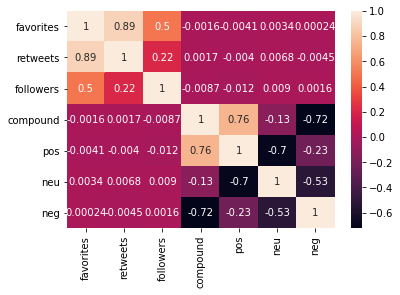

In [100]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

indicates that the stronger the sentiment, not necessarily mean more people will like or retweet it

In [101]:
metadata_labels = ['favorites', 'retweets',  'followers']
sentiment_scores_labels = ['compound', 'pos', 'neu', 'neg']

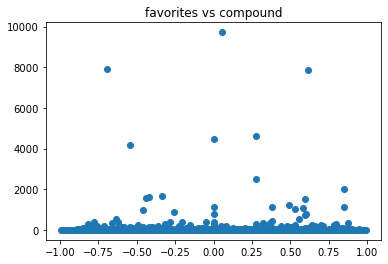

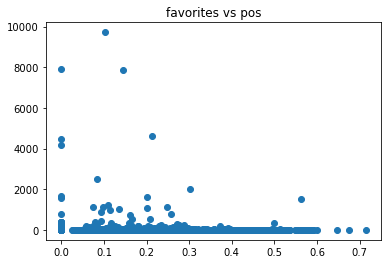

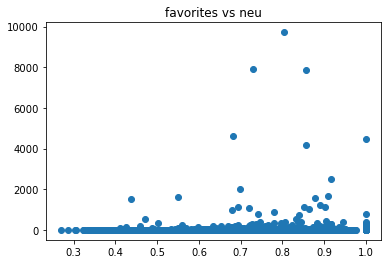

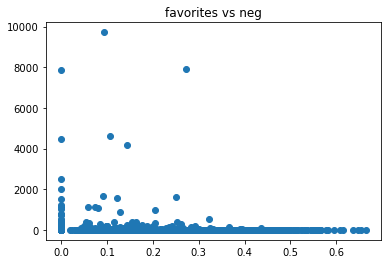

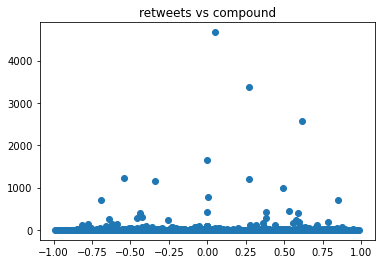

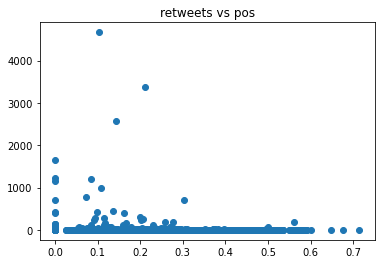

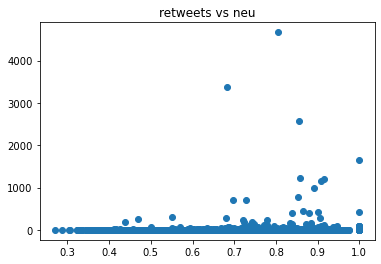

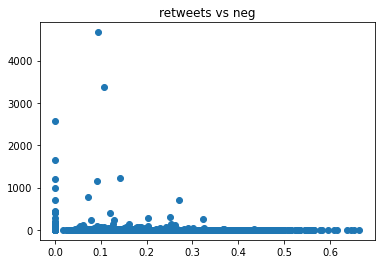

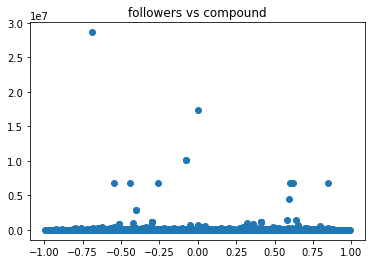

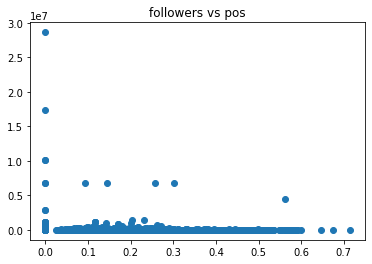

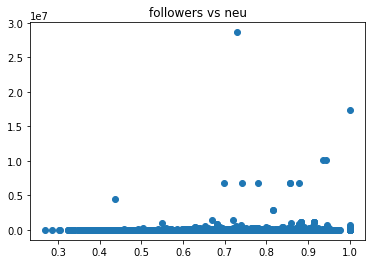

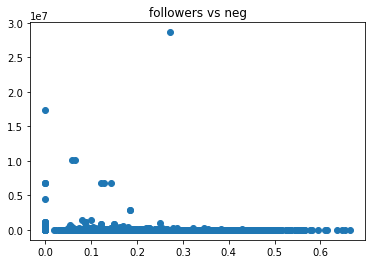

In [102]:
count1 = 0
count2 = 0
for i in metadata:
    count2 = 0
    for j in sentiment_scores:
        title = metadata_labels[count1] + " vs "+ sentiment_scores_labels[count2]
        plt.figure()
        plt.title(title)
        plt.scatter(j,i)
        count2 = count2 + 1
    count1 = count1 + 1
        

(0.0, 750.0)

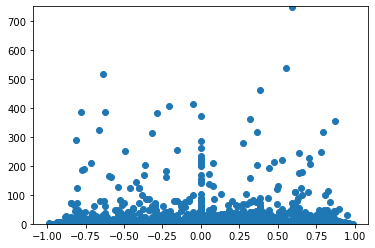

In [103]:
plt.scatter(compound,favorites)
plt.ylim(0,750)

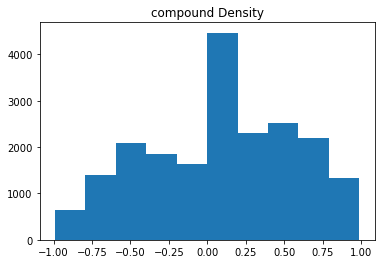

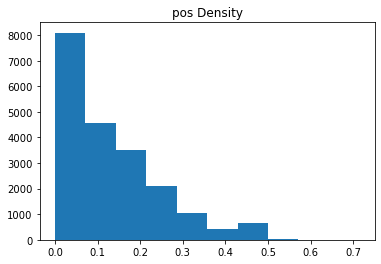

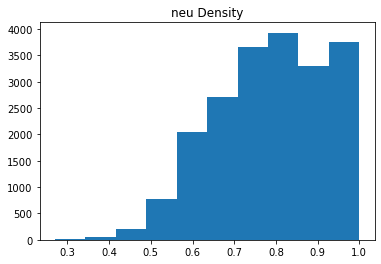

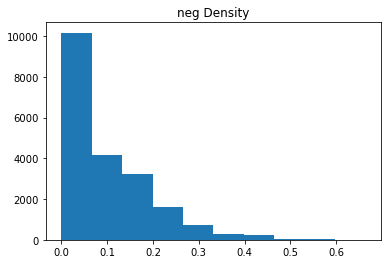

In [104]:
count = 0
for j in sentiment_scores:
    plt.figure()
    title =  sentiment_scores_labels[count] + " Density"
    plt.title(title)
    plt.hist(j)
    count = count + 1
        

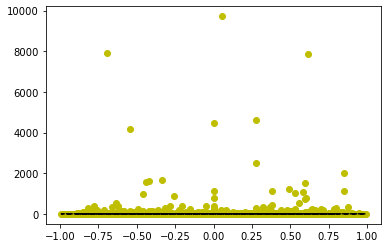

In [105]:
m,b = polyfit(compound, favorites, 1) 
plot(compound, favorites, 'yo', compound, m*compound+b, '--k') 
show() 

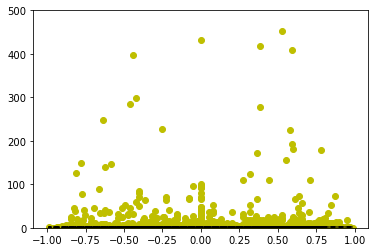

In [106]:
m,b = polyfit(compound, retweets, 1) 
plot(compound, retweets, 'yo', compound, m*compound+b, '--k') 
ylim(0,500)
show() 
